<ipython-input-9-e4c28f4ee766>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['date'] = pd.to_datetime(series['date'], errors='coerce')
<ipython-input-9-e4c28f4ee766>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['date'] = pd.to_datetime(series['date'], errors='coerce')


DTW distance between trends: 5.064415216376669
DTW distance between seasonality: 10.586849178100522
Epoch 1/50
19/19 [==============================] - 6s 149ms/step - loss: 30.8411 - val_loss: 13.9950 - lr: 0.0010
Epoch 2/50
 1/19 [>.............................] - ETA: 2s - loss: 22.1298

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 3s 134ms/step - loss: 15.3436 - val_loss: 8.4756 - lr: 0.0010
Epoch 3/50
19/19 [==============================] - 3s 145ms/step - loss: 17.2599 - val_loss: 11.8267 - lr: 0.0010
Epoch 4/50
19/19 [==============================] - 3s 178ms/step - loss: 19.8553 - val_loss: 17.0211 - lr: 0.0010
Epoch 5/50
19/19 [==============================] - 2s 108ms/step - loss: 18.6974 - val_loss: 15.5131 - lr: 0.0010
Epoch 6/50
19/19 [==============================] - 2s 108ms/step - loss: 15.4149 - val_loss: 13.1324 - lr: 0.0010
Epoch 7/50
19/19 [==============================] - 2s 107ms/step - loss: 17.2156 - val_loss: 18.0640 - lr: 0.0010
Epoch 8/50
19/19 [==============================] - 2s 121ms/step - loss: 15.1319 - val_loss: 10.6462 - lr: 2.0000e-04
Epoch 9/50
19/19 [==============================] - 3s 141ms/step - loss: 14.0447 - val_loss: 17.9425 - lr: 2.0000e-04
Epoch 10/50
19/19 [==============================] - 3s 156ms/step - loss: 12.4870 -

1/1 [==============================] - 0s 287ms/step
Epoch 1/50
11/11 [==============================] - 7s 279ms/step - loss: 71.5703 - val_loss: 9.0833 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 3s 252ms/step - loss: 23.4595 - val_loss: 26.6522 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 3s 219ms/step - loss: 20.4730 - val_loss: 10.3349 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 2s 216ms/step - loss: 19.3726 - val_loss: 9.9036 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 2s 179ms/step - loss: 19.6170 - val_loss: 10.1961 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 2s 215ms/step - loss: 20.5973 - val_loss: 28.0247 - lr: 0.0010
Epoch 7/50
11/11 [==============================] - 2s 178ms/step - loss: 22.0767 - val_loss: 14.9677 - lr: 2.0000e-04
Epoch 8/50
11/11 [==============================] - 2s 227ms/step - loss: 14.7495 - val_loss: 11.2576 - lr: 2.0000e-04
Epoch 9/50
11/11 [===

1/1 [==============================] - 0s 237ms/step
Epoch 1/50
19/19 [==============================] - 5s 126ms/step - loss: 50.4685 - val_loss: 13.0188 - lr: 0.0010
Epoch 2/50
19/19 [==============================] - 2s 105ms/step - loss: 19.5387 - val_loss: 18.7389 - lr: 0.0010
Epoch 3/50
19/19 [==============================] - 3s 161ms/step - loss: 19.5677 - val_loss: 12.8120 - lr: 0.0010
Epoch 4/50
19/19 [==============================] - 3s 137ms/step - loss: 20.4265 - val_loss: 16.5616 - lr: 0.0010
Epoch 5/50
19/19 [==============================] - 2s 101ms/step - loss: 21.2827 - val_loss: 12.9357 - lr: 0.0010
Epoch 6/50
19/19 [==============================] - 2s 121ms/step - loss: 18.9795 - val_loss: 9.7231 - lr: 0.0010
Epoch 7/50
19/19 [==============================] - 2s 122ms/step - loss: 17.2578 - val_loss: 11.3745 - lr: 0.0010
Epoch 8/50
19/19 [==============================] - 2s 105ms/step - loss: 18.5027 - val_loss: 13.7080 - lr: 0.0010
Epoch 9/50
19/19 [==========

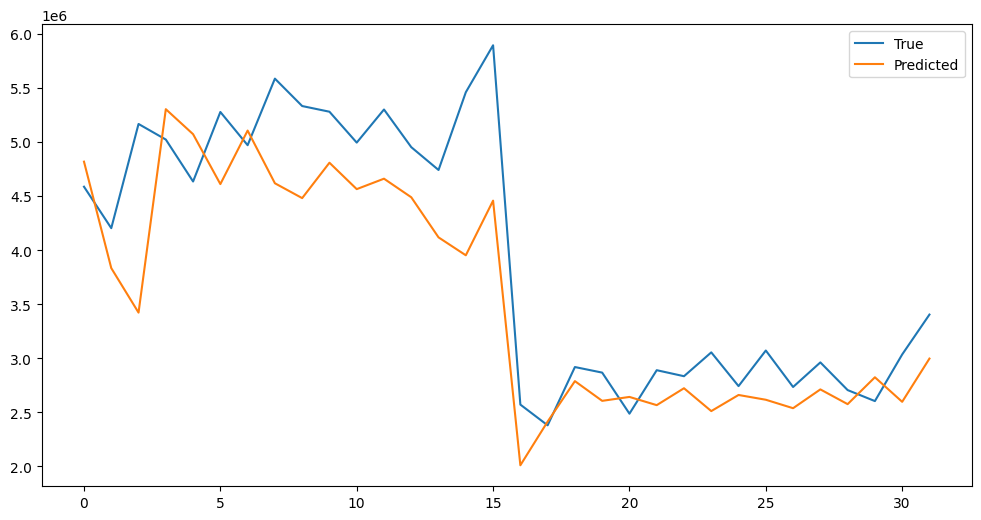

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.models import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt

# Read the data
data_hk = pd.read_csv("HK-2018.csv")
data_mo = pd.read_csv("MO-2018.csv")

# Preprocess the data
def preprocess_data(data):
    series = data[['date', 'arrival']]
    series['date'] = pd.to_datetime(series['date'], errors='coerce')
    series = series.set_index('date')
    return series

series_hk = preprocess_data(data_hk)
series_mo = preprocess_data(data_mo)

# Decompose the data into trend/seasonality/noise
res_hk = sm.tsa.seasonal_decompose(series_hk)
res_mo = sm.tsa.seasonal_decompose(series_mo)

# Scaling the data
scaler = MinMaxScaler()
trend_hk = res_hk.trend.dropna().values.reshape(-1, 1)
trend_mo = res_mo.trend.dropna().values.reshape(-1, 1)
sea_hk = res_hk.seasonal.dropna().values.reshape(-1, 1)
sea_mo = res_mo.seasonal.dropna().values.reshape(-1, 1)

trend_hk_nor = scaler.fit_transform(trend_hk)
trend_mo_nor = scaler.fit_transform(trend_mo)
sea_hk_nor = scaler.fit_transform(sea_hk)
sea_mo_nor = scaler.fit_transform(sea_mo)

# Calculate Dynamic Time Warping (DTW) distance
distance1, path1 = fastdtw(trend_mo_nor, trend_hk_nor, dist=euclidean)
print("DTW distance between trends:", distance1)
distance2, path2 = fastdtw(sea_mo_nor, sea_hk_nor, dist=euclidean)
print("DTW distance between seasonality:", distance2)

# Define the attention mechanism
def attention_3d_block(inputs, input_dim):
    a = Dense(input_dim, activation='relu', use_bias=True)(inputs)
    a = Activation('softmax')(a)
    output_attention_mul = multiply([inputs, a], name='attention_mul')
    return output_attention_mul

# Build the RNN model with attention
def dlm(train_x, train_y, test_x, test_y, dim1, dim2, dim3, dropout_1, batchsize, epoch):
    input_dim = train_x.shape[2]
    inputs = Input(shape=(train_x.shape[1], input_dim))
    attention_mul = attention_3d_block(inputs, input_dim)
    lstm_out = LSTM(dim2, return_sequences=False, activation='relu', dropout=0.01)(attention_mul)
    drop = Dropout(dropout_1)(lstm_out)
    output = Dense(dim3, activation='relu')(drop)
    output = Dense(1)(output)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mape', optimizer='adam')
    callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),
                 ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)]
    model.fit(train_x, train_y, batch_size=batchsize, epochs=epoch, callbacks=callbacks, verbose=1, validation_data=(test_x, test_y))
    return model

# Prepare the data for the model
def prepare_data(data, seq_len):
    data_arr = data.values
    sequences = []
    for i in range(len(data_arr) - seq_len):
        sequences.append(data_arr[i: i + seq_len])
    return np.array(sequences)

seq_len = 12
data_hk_seq = prepare_data(series_hk, seq_len)
data_mo_seq = prepare_data(series_mo, seq_len)

train_size = int(len(data_hk_seq) * 0.8)
train_x = np.concatenate((data_hk_seq[:train_size], data_mo_seq[:train_size]))
train_y = np.concatenate((series_hk['arrival'].values[seq_len:train_size + seq_len], series_mo['arrival'].values[seq_len:train_size + seq_len]))

test_x = np.concatenate((data_hk_seq[train_size:], data_mo_seq[train_size:]))
test_y = np.concatenate((series_hk['arrival'].values[train_size + seq_len:], series_mo['arrival'].values[train_size + seq_len:]))

# Hyperparameters for the grid search
lstm_unit = [512, 256]
drop_1 = [0.2, 0.3]
dense_unit = [128, 64]
batch_size_num = [7, 12]
epoch = 50

grid_search = list(itertools.product(lstm_unit, drop_1, dense_unit, batch_size_num))

# Perform grid search
best_mape = float('inf')
best_model = None
for params in grid_search:
    lstm_units, dropout, dense_units, batch_size = params
    model = dlm(train_x, train_y, test_x, test_y, train_x.shape[2], lstm_units, dense_units, dropout, batch_size, epoch)
    predictions = model.predict(test_x)
    mape = np.mean(np.abs((test_y - predictions.flatten()) / test_y)) * 100
    if mape < best_mape:
        best_mape = mape
        best_model = model

print("Best MAPE:", best_mape)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='True')
plt.plot(predictions.flatten(), label='Predicted')
plt.legend()
plt.show()
